# Análisis de eficiencia de estrategia de marketing de un banco portugués, proyecto de Ciencia de Datos
#### Matías Daniel Díaz Sarmiento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Variables:
#### Client data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
#### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  
#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  


In [ ]:
data = pd.read_csv("dataset.csv", sep=";")
print(data)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [ ]:
data.head() # Devuelve el encabezado del dataset para ver más o menos como se ven los datos bien separados y ordenados, 
            # y compruebo la correcta carga de datos.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploración de datos

In [ ]:
data.columns # Me fijo qué columnas tienen los datos, y ubico a la variable de interés "y"

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data.shape # Del print(data) podíamos ver que los datos son una matriz de 41188 rows x 21 columns

(41188, 21)

In [ ]:
data.info() # Es absolutamente necesario comprobar que no haya datos nulos en el dataset para continuar, y además
            # así veo qué tipo de dato contiene cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No hay datos nulos, puedo proceder con tranquilidad.

In [ ]:
df = data[data['duration']>=10]
df.describe() # Hago un análisis de los datos en las columnas donde tengo variables numéricas.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40898.000000,40898.000000,40898.000000,40898.000000,40898.00000,40898.000000,40898.000000,40898.000000,40898.000000,40898.000000
mean,40.035405,260.066165,2.547068,962.313414,0.17304,0.086075,93.575149,-40.488075,3.628004,5167.361727
std,10.423732,259.329531,2.728991,187.309653,0.49499,1.571174,0.578517,4.630305,1.731863,71.978096
min,17.000000,10.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,104.000000,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.00000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,321.000000,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Variables como la edad, índices de confianza, número de empleados y pdays parecen seguir una distribución normal (la media es muy similar a la mediana)

Notar que 'duration' es recomendable que sea descartada para tener un modelo realista de eficiencia del telemarketing,
ya que los valores para duration==0 derivan en y=="no", lo cual es esperable, si no hubo llamada, no hubo contratación.
Sin embargo para hacer un análisis refinado no la descarto, sino que elimino los valores conflictivos. Entonces, debería de incluir los registros donde duration >= 10, pues 10 segundos considero que es un tiempo prudencial
ya que el cerebro tarda hasta 10 segundos en hacer decisiones (https://www.nature.com/articles/news.2008.751#:~:text=Brain%20activity%20predicts%20decisions%20before%20they%20are%20consciously%20made.&text=Your%20brain%20makes%20up%20its,realize%20it%2C%20according%20to%20researchers.).
Es decir, tomando duration>=10 estaríamos trabajando con los clientes que ya tomaron una decisión.

Entonces los datos sobre los que trabajaré serán los datos de df. Repito la exploración preliminar.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.shape

(41165, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41165 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41165 non-null  int64  
 1   job             41165 non-null  object 
 2   marital         41165 non-null  object 
 3   education       41165 non-null  object 
 4   default         41165 non-null  object 
 5   housing         41165 non-null  object 
 6   loan            41165 non-null  object 
 7   contact         41165 non-null  object 
 8   month           41165 non-null  object 
 9   day_of_week     41165 non-null  object 
 10  duration        41165 non-null  int64  
 11  campaign        41165 non-null  int64  
 12  pdays           41165 non-null  int64  
 13  previous        41165 non-null  int64  
 14  poutcome        41165 non-null  object 
 15  emp.var.rate    41165 non-null  float64
 16  cons.price.idx  41165 non-null  float64
 17  cons.conf.idx   41165 non-null 

In [ ]:
df.describe(include=[object]) # Como las variables categóricas están en formato objeto, uso esto.

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41165,41165,41165,41165,41165,41165,41165,41165,41165,41165,41165
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10415,24913,12162,32565,21561,33930,26138,13760,8620,35543,36525


Más de la mitad son casados, la mayoría no tiene créditos en default ni préstamos, a más de la mitad se los contactó por celular
la mayoría no participó de la anterior campaña de marketing y la mayoría dijo que no le interesaba contratar el servicio.

Ahora estudiaré como se comportaron los clientes respecto a la variable target relacionando variables entre sí.

#### ¿Como se comportan las variables respecto al target?

In [ ]:
df.groupby(['y']).count()['duration']

y
no     36258
yes     4640
Name: duration, dtype: int64

Hubo 36258 clientes que dijeron que no les interesaba contratar el servicio y 4640 que sí.

In [ ]:
# SuccessRate = Personas que dicen que sí / Total de personas de la misma categoría
SuccessRate = 4650/41165
print(SuccessRate)

0.11296003886797036


In [ ]:
df.groupby(['poutcome']).count()['duration']

poutcome
failure         4218
nonexistent    35311
success         1369
Name: duration, dtype: int64

In [ ]:
PrevSuccessRate = 1369/(4218+1369)
print(PrevSuccessRate)

0.24503311258278146


De los participantes de la anterior campaña, se muestra un resultado bastante más favorable en cuanto a la tasa de éxito, 
lo cual indicaría que esta campaña no fue tan buena como la anterior.

In [ ]:
df.groupby(['y','poutcome']).count()['duration']

y    poutcome   
no   failure         3613
     nonexistent    32170
     success          475
yes  failure          605
     nonexistent     3141
     success          894
Name: duration, dtype: int64

Respecto a la campaña de marketing anterior, la grandísima mayoría no había participado.
Sin embargo es interesante observar que de quienes participaron, a simple vista pareciera que no cambiaron mucho su decisión.
Esto da cuenta de una estrategia de marketing que tal vez haya sido poco innovadora.

In [ ]:
df.groupby(['marital']).count()['duration']

marital
divorced     4581
married     24784
single      11454
unknown        79
Name: duration, dtype: int64

In [ ]:
df.groupby(['y','marital']).count()['duration'] #Vamos a comparar si el estar casado o no influye en la toma de la decisión

y    marital 
no   divorced     4105
     married     22252
     single       9834
     unknown        67
yes  divorced      476
     married      2532
     single       1620
     unknown        12
Name: duration, dtype: int64

In [ ]:
MarriedSuccessRate = 2532/(22252+2532)
SingleSuccessRate = (1620+476+12)/(9834+1620+4105+476+67+12)
print(MarriedSuccessRate)
print(SingleSuccessRate)

0.10216268560361523
0.13081792230358694


Aquí vemos que la casi totalidad de casados dijeron que no, lo cual va en concordancia con la hipótesis que venía manejando, que es esperable que esto pase en un entorno marital, pues las decisiones
suelen ser consultadas con la pareja.  
Sin embargo, se observan números similares para quienes se encuentran en alguna forma de soltería (soltero, divorciado/viudo).
Esto indicaría que en este caso, el estar casado o no, no estaría influyendo en la decisión de la contratación del servicio.

In [ ]:
df.groupby(['y','job']).count()['duration'] #Vamos a comparar si el tipo de trabajo influye en la toma de la decisión

y    job          
no   admin.           8990
     blue-collar      8552
     entrepreneur     1315
     housemaid         947
     management       2581
     retired          1281
     self-employed    1264
     services         3620
     student           590
     technician       5965
     unemployed        861
     unknown           292
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
Name: duration, dtype: int64

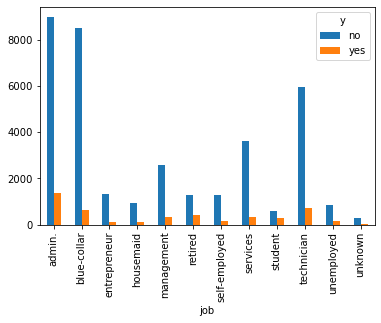

In [ ]:
grouped_job = df.groupby(['y','job']).count()['duration']
(grouped_job.unstack(level=0).plot.bar())
plt.show()

In [ ]:
grouped_job.unstack(level=0)

y,no,yes
job,,
admin.,8990,1352
blue-collar,8552,638
entrepreneur,1315,124
housemaid,947,106
management,2581,328
retired,1281,434
self-employed,1264,149
services,3620,323
student,590,275


Observamos que la tasa de éxito aparentemente es mayor en estudiantes y que los grupos mayoritarios en cuanto al trabajo son
los empleados administrativos, los blue-collar (obreros) y técnicos.

In [ ]:
df.groupby(['y','education']).count()['duration'] #Vamos a comparar si el tipo de educacion influye en la toma de la decisión

y    education          
no   basic.4y                3731
     basic.6y                2086
     basic.9y                5524
     high.school             8407
     illiterate                14
     professional.course     4609
     university.degree      10420
     unknown                 1467
yes  basic.4y                 428
     basic.6y                 188
     basic.9y                 473
     high.school             1031
     illiterate                 4
     professional.course      595
     university.degree       1670
     unknown                  251
Name: duration, dtype: int64

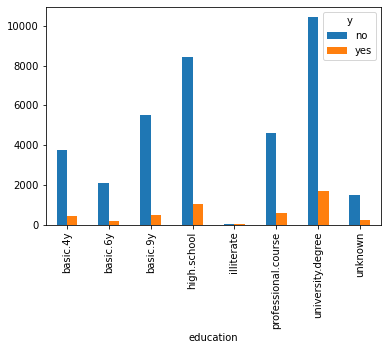

In [ ]:
grouped_ed = df.groupby(['y','education']).count()['duration']
(grouped_ed.unstack(level=0).plot.bar())
plt.show()

In [ ]:
grouped_ed.unstack(level=0)

y,no,yes
education,,
basic.4y,3731,428
basic.6y,2086,188
basic.9y,5524,473
high.school,8407,1031
illiterate,14,4
professional.course,4609,595
university.degree,10420,1670
unknown,1467,251


De nuevo, el tipo de educación no parece influir en la toma de la decisión.  
Sigamos viendo si hay otra variable que lo explique (tal vez el medio de contacto y/o el día de la semana?).

In [ ]:
df.groupby(['y','contact']).count()['duration'] #Vamos a comparar si el tipo de contacto influye en la toma de la decisión

y    contact  
no   cellular     22157
     telephone    14101
yes  cellular      3853
     telephone      787
Name: duration, dtype: int64

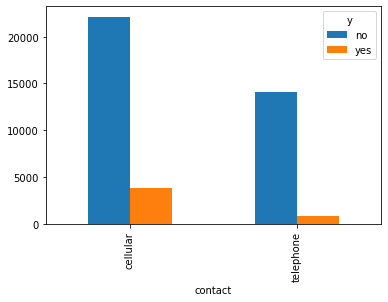

In [ ]:
grouped_contact = df.groupby(['y','contact']).count()['duration']
(grouped_contact.unstack(level=0).plot.bar())
plt.show()

In [ ]:
grouped_contact.unstack(level=0)

y,no,yes
contact,,
cellular,22157,3853
telephone,14101,787


In [ ]:
CellPhoneSuccessRate = 3853/(22157+3853)
PhoneSuccessRate = 787/(14101+787)
print(CellPhoneSuccessRate)
print(PhoneSuccessRate)

0.14813533256439831
0.05286136485760344


Parece ser que las personas que fueron contactadas por celular estuvieron más dispuestas a suscribirse al producto.

In [ ]:
df.groupby(['y','day_of_week']).count()['duration'] # Vamos a comparar si el día de la semana en que fueron contactados
                                                # influye en la toma de la decisión

y    day_of_week
no   fri            6892
     mon            7590
     thu            7520
     tue            7096
     wed            7160
yes  fri             846
     mon             847
     thu            1045
     tue             953
     wed             949
Name: duration, dtype: int64

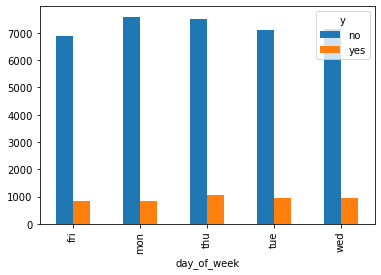

In [ ]:
grouped_day = df.groupby(['y','day_of_week']).count()['duration']
(grouped_day.unstack(level=0).plot.bar())
plt.show()

El día de la semana tampoco influye en la contratación del servicio.
Un factor determinante para contratar el servicio podría ser la edad, ya vimos que por ejemplo los estudiantes (un grupo etario típicamente joven) estaban más dispuestos a contratarlo. Para eso, separemos la edad en intervalos más trabajables y creemos una nueva variable "age_group" que sería el grupo etario.

In [ ]:
data['age_group'] = pd.cut(x=data['age'], bins=[19, 29, 39, 49, 59, 69, 79, 89, 99])

In [ ]:
data["age_group"] = data["age_group"].astype(object)

In [ ]:
print(data)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  pdays  pre

In [ ]:
# Vuelvo a indicar quién es df, así se carga la nueva columna de grupo etario
df = data[data['duration']>=10]
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40898.000000,40898.000000,40898.000000,40898.000000,40898.00000,40898.000000,40898.000000,40898.000000,40898.000000,40898.000000
mean,40.035405,260.066165,2.547068,962.313414,0.17304,0.086075,93.575149,-40.488075,3.628004,5167.361727
std,10.423732,259.329531,2.728991,187.309653,0.49499,1.571174,0.578517,4.630305,1.731863,71.978096
min,17.000000,10.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,104.000000,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.00000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,321.000000,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age_group
count,40898,40898,40898,40898,40898,40898,40898,40898,40898,40898,40898,40823
unique,12,4,8,3,3,3,2,10,5,3,2,8
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no,"(29.0, 39.0]"
freq,10342,24784,12090,32340,21411,33716,26010,13668,8565,35311,36258,16828


In [ ]:
df.groupby(['y','age_group']).count()['duration'] # Vamos a comparar si el grupo etario influye en la toma de la decisión

y    age_group   
no   (19.0, 29.0]     4645
     (29.0, 39.0]    15113
     (39.0, 49.0]     9619
     (49.0, 59.0]     6121
     (59.0, 69.0]      472
     (69.0, 79.0]      174
     (79.0, 89.0]       68
     (89.0, 99.0]        5
yes  (19.0, 29.0]      888
     (29.0, 39.0]     1715
     (39.0, 49.0]      834
     (49.0, 59.0]      697
     (59.0, 69.0]      251
     (69.0, 79.0]      144
     (79.0, 89.0]       72
     (89.0, 99.0]        5
Name: duration, dtype: int64

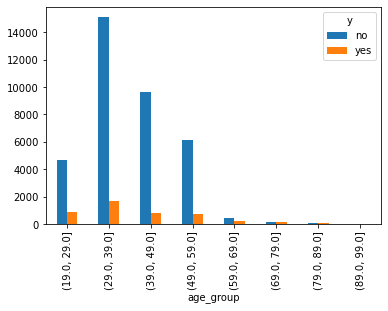

In [ ]:
grouped_age = df.groupby(['y','age_group']).count()['duration']
(grouped_age.unstack(level=0).plot.bar())
plt.show()

La edad tampoco parece ser un factor importante, sino más bien la ocupación (como vimos, los estudiantes están más dispuestos).  Ya analizamos datos del cliente y no encontramos relaciones muy fuertes. Concentrémonos en el análisis de otras variables más globales, tales como contextos socioeconómicos, y la relación del cliente con el banco (sería de esperar que aquellos que más cercanía tienen ya sea por la duración de la llamada o si ya confió al banco depósitos anteriores o préstamos sean más propensos a suscribirse al producto).

Analicemos primero la duración de último contacto (a mayor duración, podríamos interpretar que el cliente más interesado está). Dividamos la duración en intervalos.

In [ ]:
data['duration_interval'] = pd.cut(x=data['duration'], bins=[30, 60, 120, 300, 600, 4920]) 
#En segundos, el último intervalo sería "10 min o más"

In [ ]:
data["duration_interval"] = data["duration_interval"].astype(object)

In [ ]:
print(data)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  pdays  pre

In [ ]:
df = data[data['duration']>=10]
df.groupby(['y','duration_interval']).count()['duration'] # Vamos a comparar si la duración influye en la toma de la decisión

y    duration_interval
no   (30.0, 60.0]          2561
     (60.0, 120.0]         8466
     (120.0, 300.0]       15715
     (300.0, 600.0]        6302
     (600.0, 4920.0]       1780
yes  (30.0, 60.0]             1
     (60.0, 120.0]          165
     (120.0, 300.0]        1352
     (300.0, 600.0]        1438
     (600.0, 4920.0]       1684
Name: duration, dtype: int64

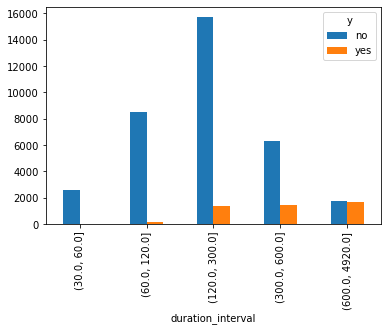

In [ ]:
grouped_duration = df.groupby(['y','duration_interval']).count()['duration']
(grouped_duration.unstack(level=0).plot.bar())
plt.show()

Aquí vemos de forma clara que mientras más dure la llamada, más probable es que acepte suscribirse.  
El número de gente que acepta suscribirse crece con cuanto duró su llamada.

También podría ser que el mes en el que se hace la última llamada sea un factor determinante a la hora de suscribirse, veamos:

In [ ]:
df.groupby(['y','month']).count()['duration'] # Vamos a comparar si el mes influye en la toma de la decisión

y    month
no   apr       2069
     aug       5497
     dec         93
     jul       6483
     jun       4710
     mar        270
     may      12782
     nov       3667
     oct        392
     sep        295
yes  apr        539
     aug        655
     dec         89
     jul        649
     jun        559
     mar        276
     may        886
     nov        416
     oct        315
     sep        256
Name: duration, dtype: int64

[]

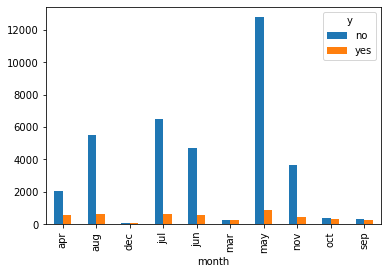

In [ ]:
grouped_month = df.groupby(['y','month']).count()['duration']
(grouped_month.unstack(level=0).plot.bar())
plt.plot()

Parece que el mes de mayo es el que se hicieron más llamadas y donde menos se hicieron (pero más aceptaron) fue en octubre y septiembre, vamos viendo un patrón, podemos confirmar las correlaciones entre variables numéricas con una matriz de correlación:

In [ ]:
corMat = df.corr()

In [ ]:
corMat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.001933,0.005188,-0.034405,0.024332,-0.001760,0.000908,0.129729,0.009000,-0.020387
duration,-0.001933,1.000000,-0.065970,-0.046964,0.020633,-0.030761,0.006225,-0.011279,-0.036958,-0.049610
campaign,0.005188,-0.065970,1.000000,0.052153,-0.078878,0.151097,0.129118,-0.009816,0.135501,0.142669
pdays,-0.034405,-0.046964,0.052153,1.000000,-0.588106,0.272333,0.079465,-0.091401,0.298797,0.375589
previous,0.024332,0.020633,-0.078878,-0.588106,1.000000,-0.421752,-0.203761,-0.050857,-0.456413,-0.504617
emp.var.rate,-0.001760,-0.030761,0.151097,0.272333,-0.421752,1.000000,0.777630,0.193540,0.972430,0.908377
cons.price.idx,0.000908,0.006225,0.129118,0.079465,-0.203761,0.777630,1.000000,0.056435,0.691915,0.528372
cons.conf.idx,0.129729,-0.011279,-0.009816,-0.091401,-0.050857,0.193540,0.056435,1.000000,0.275754,0.098812
euribor3m,0.009000,-0.036958,0.135501,0.298797,-0.456413,0.972430,0.691915,0.275754,1.000000,0.945578
nr.employed,-0.020387,-0.049610,0.142669,0.375589,-0.504617,0.908377,0.528372,0.098812,0.945578,1.000000


In [ ]:
import seaborn as sns

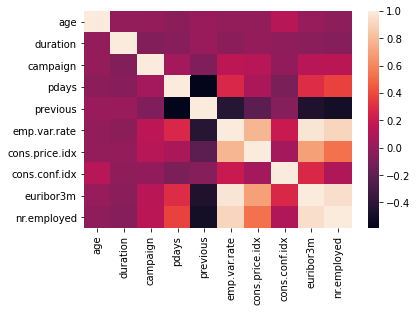

In [ ]:
ax = sns.heatmap(corMat)

Aquí vemos que el número de empleados, el euribor y la tasa de variación de empleo presentan una correlación interesante entre las tres. Veamos qué se puede extraer de esa relación.

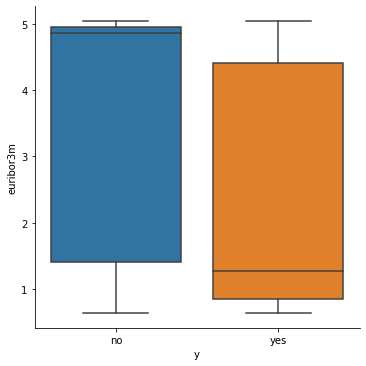

In [ ]:
sns.catplot(x="y", y="euribor3m", kind="box", data=df)

Que la gente sea más propensa a decir que sí cuando el Euribor está bajo es un resultado interesante, y es de esperar que el Euribor varíe a lo largo del año, pues este es la tasa de interés interbancario europea, veamos si hay una relación entre el decir que sí, el mes y la tasa de variación del Euribor.

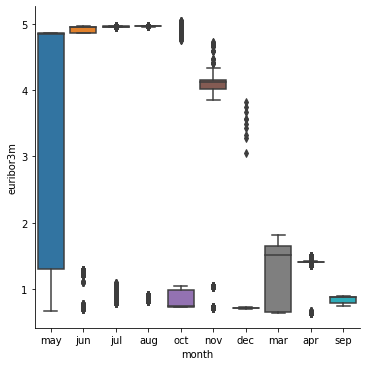

In [ ]:
sns.catplot(x="month", y="euribor3m", kind="box", data=df)

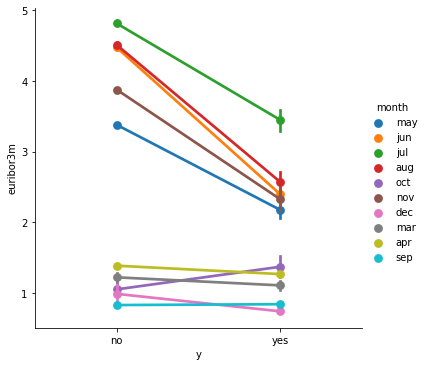

In [ ]:
sns.catplot(x="y", y="euribor3m", hue="month", kind="point", data=df)

Aquí vemos que en meses en los que el Euribor está más alto (como en mayo y julio) la gente es más propensa a decir que no (lo cual mostrábamos en el gráfico de barras anterior, que donde más llamadas se hacían era en mayo y era donde más se rechazaba el producto). En los meses en los que está más bajo, la gente es más propensa a decir que sí.

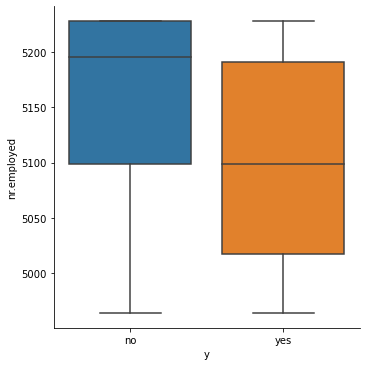

In [ ]:
sns.catplot(x="y", y="nr.employed", kind="box", data=df)

Vimos en el heatmap una clara correlación entre el euribor a 3 meses (tipo de interés del mercado interbancario del Euro) y el número de empleados. Cuando el euribor es más bajo, pareciera que los clientes son más propensos a decir que sí que cuando es más alto (pues a menor interés de préstamo bancario europeo, tal vez más seguridad sienten). A la vez, vemos que los clientes son más propensos a decir que sí cuando hay alrededor de 5100 empleados.

A su vez, como el número de empleados está correlacionado con la tasa de variación de los mismos, veamos como es la relación entre la tasa de variación de empleados y la suscripción al producto.

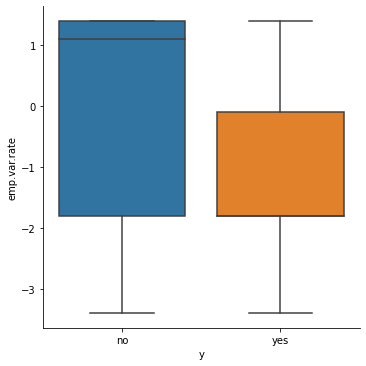

In [ ]:
sns.catplot(x="y", y="emp.var.rate", kind="box", data=df)

Se puede ver que cuando la tasa de variación de empleo es negativa, los clientes son más propensos a decir que sí.  
Ya encontramos algunas variables que explican bastante fuertemente la tendencia. Tratemos ahora de considerar algunas variables que no tengan que ver tanto con el contexto sino con la confianza del cliente hacia el banco (tales como si solicitó un préstamo de algún tipo, o el número de días que el cliente fue contactado por última vez en una campaña anterior).

In [ ]:
df.groupby(['y','housing']).count()['duration'] # Vamos a comparar si un préstamo hipotecario influye en la toma de la decisión

y    housing
no   no         16477
     unknown      877
     yes        18904
yes  no          2026
     unknown      107
     yes         2507
Name: duration, dtype: int64

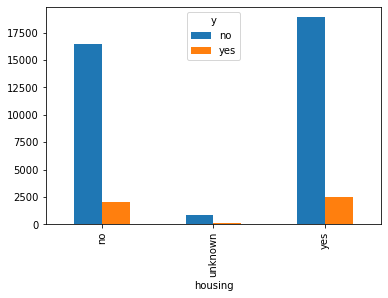

In [ ]:
grouped_housing = df.groupby(['y','housing']).count()['duration']
(grouped_housing.unstack(level=0).plot.bar())
plt.show()

In [ ]:
df.groupby(['y','loan']).count()['duration'] # Vamos a comparar si un préstamo influye en la toma de la decisión

y    loan   
no   no         29866
     unknown      877
     yes         5515
yes  no          3850
     unknown      107
     yes          683
Name: duration, dtype: int64

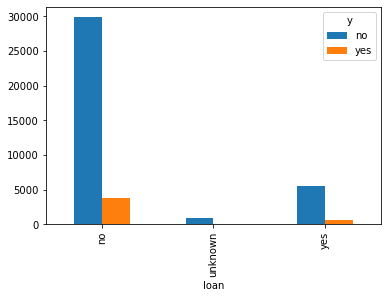

In [ ]:
grouped_loan = df.groupby(['y','loan']).count()['duration']
(grouped_loan.unstack(level=0).plot.bar())
plt.show()

Tener un préstamo hipotecario o un préstamo ordinario no pareciera influir mucho en que acepten o no suscribirse al producto.  Hasta ahora lo que estamos teniendo es que la confianza del cliente en el banco no influye en la suscripción. Confirmémoslo con un análisis respecto al último contacto con el cliente (hipótesis: es de esperar que los clientes que se contactaron hace poco sean los más fieles).

In [ ]:
data['pdays_last'] = pd.cut(x=data['pdays'], bins=[7, 15, 30, 60, 90, 180, 365, 545, 1000]) #En días, el último intervalo sería "año y medio o más (incluyendo sin contactar)"

In [ ]:
data["pdays_last"] = data["pdays_last"].astype(object) #Intervalos de días de último contacto

In [ ]:
print(data)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  pdays  pre

In [2]:
df = data[data['duration']>=10]
df.groupby(['y','pdays_last']).count()['duration'] # Vamos a comparar si la cantidad de días desde el último contacto influye en la toma de la decisión

NameError: ignored

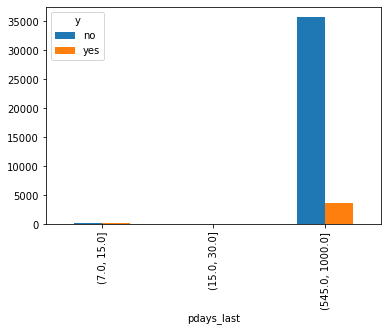

In [ ]:
grouped_pdays_last = df.groupby(['y','pdays_last']).count()['duration']
(grouped_pdays_last.unstack(level=0).plot.bar())
plt.show()

No se alcanza a apreciar relación de ningún tipo entre la cantidad de días atrás que fue contactado un cliente y su suscripción. Sin embargo, mirando los datos numéricos, vemos que la cantidad de clientes que dijeron sí o no y que fueron contactados en un rango de una semana a un mes atrás es casi la misma.

### CONCLUSIONES:
1) De los participantes de la anterior campaña, se muestra un resultado bastante más favorable en cuanto a la tasa de éxito, lo cual indicaría que esta campaña no fue tan buena como la anterior. Sin embargo, no tenemos todos los datos de la campaña anterior para comprobar esta hipótesis.  
2) Respecto a la campaña de marketing anterior, la grandísima mayoría de los participantes actuales no había participado. Sin embargo es interesante observar que de quienes participaron, a simple vista pareciera que no cambiaron mucho su decisión. Esto da cuenta de una estrategia de marketing que tal vez haya sido poco innovadora.  
3)  La casi totalidad de casados dijeron que no, lo cual es esperable pues en un entorno marital, las decisiones deberían ser consultadas con la pareja. Sin embargo, se observan números similares para quienes se encuentran en alguna forma de soltería (soltero, divorciado/viudo). Esto indicaría que en este caso, el estar casado o no, no estaría influyendo en la decisión de la contratación del servicio.  
4) Los estudiantes parecieran estar ligeramente más inclinados a contratar el servicio, sin embargo esta hipótesis pareciera descartarse mirando un gráfico de puntos.  
5) El tipo de educación pareciera no influir en la toma de la decisión, pero se observa una tendencia interesante al "sí" en los grupos basic.6y y basic.9y.  
6) Las personas contactadas por celular estuvieron algo más dispuestas a contratar el servicio.  
7) El día de la semana o la edad tampoco influyen en la contratación del servicio.  
8) La probabilidad de suscribirse aumenta con la duración de la llamada (se podría interpretar como que a mayor duración, mayor interés).    
9) En meses en los que el Euribor está más alto (como en mayo) la gente es más propensa a decir que no (lo cual mostrábamos en el gráfico de barras anterior, que donde más llamadas se hacían era en mayo y era donde más se rechazaba el producto). En los meses en los que está más bajo, la gente es más propensa a decir que sí.  
10) Los clientes son más propensos a decir que sí cuando la cantidad de empleados es cercana a 5100 y cuando la tasa de variación de empleo es negativa. Esto último sobre todo tiene sentido ya que se trata de suscripciones a plazos fijos. Es de esperar que en épocas donde aumenta el desempleo (variación de empleo negativa) y euribor bajo (tasa interbancaria baja) los clientes quieran resguardar sus ahorros.   
11) La confianza del cliente hacia el banco (tales como si solicitó un préstamo de algún tipo, o el número de días que el cliente fue contactado por última vez en una campaña anterior) no influye en la toma de la decisión.  

##### Por lo tanto, el euribor, el mes de la llamada, la cantidad de empleados y la tasa de variación de empleo son factores importantes para tomar la decisión según los datos. Es decir, los factores que juegan un rol en la decisión de suscribirse a un plazo fijo (bank term deposit) son factores socioeconómicos y contextuales, no personales ni particulares.

##### La recomendación al banco sería que esté atento a los meses en los que el euribor es bajo, la cantidad de empleados sea de alrededor de 5100 y la tasa de variación de empleo sea negativa para lanzar su campaña de marketing. Dado que el euribor, la tasa de variación de empleo y el número de empleados están correlacionados entre sí, las condiciones favorables para dicha campaña se dan en los meses de marzo, abril, septiembre, octubre y diciembre.

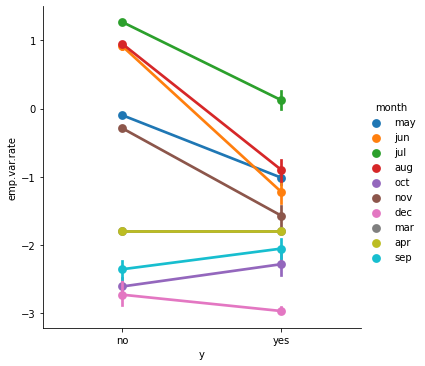

In [ ]:
sns.catplot(x="y", y="emp.var.rate", hue="month", kind="point", data=df)

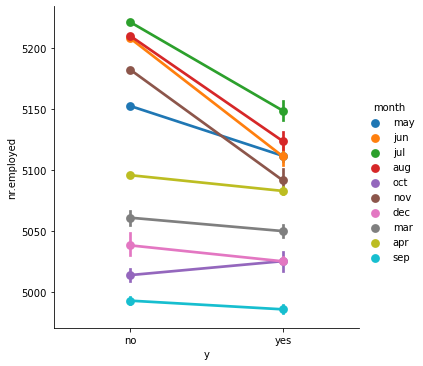

In [ ]:
sns.catplot(x="y", y="nr.employed", hue="month", kind="point", data=df)

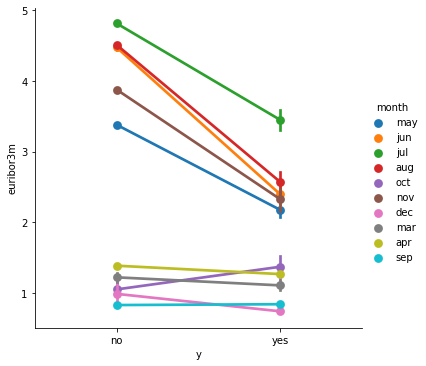

In [ ]:
sns.catplot(x="y", y="euribor3m", hue="month", kind="point", data=df)

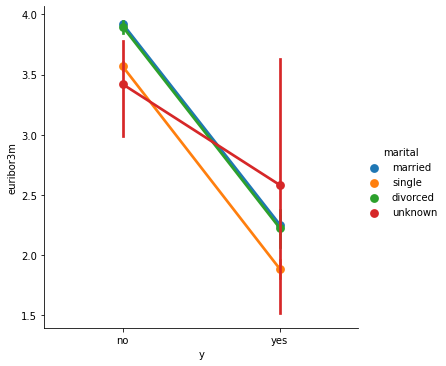

In [ ]:
sns.catplot(x="y", y="euribor3m", hue="marital", kind="point", data=df)

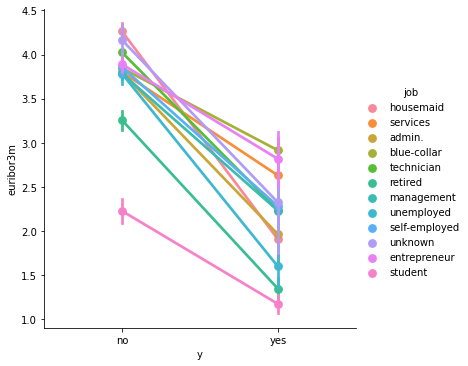

In [ ]:
sns.catplot(x="y", y="euribor3m", hue="job", kind="point", data=df)

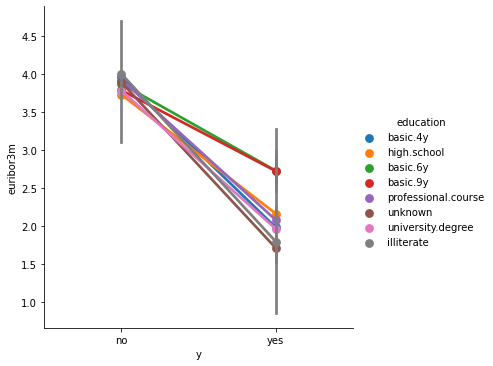

In [ ]:
sns.catplot(x="y", y="euribor3m", hue="education", kind="point", data=df)

### MODELOS

Antes de hacer los modelos, conviene estandarizar datos y conviene convertir a "y" en una variable numérica que llamaremos "dummy" agregando una nueva columna. También conviene convertir al mes en numérico ordinal.

Divido el dataframe en train y test:

In [ ]:
# selección de modelos
from sklearn.model_selection import train_test_split
# normalización de datos
from sklearn.preprocessing import StandardScaler
# clasificador: red neuronal (perceptron multicapa, 100 capas por defecto, activación por ReLu)
from sklearn.neural_network import MLPClassifier
# clasificador: support vector classifier
from sklearn.svm import SVC
# clasificador: árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# clasificador: Regresión Logística
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("dataset.csv", sep=";")
data["dummy"] = np.where(data["y"].str.contains("yes"), 1, 0)
df = data[data['duration']>=10]

num_month = {"month":     {"mar":3,"apr": 4, "may": 5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11,"dec":12}}
# reescribo al mes como variable ordinal.
df = df.replace(num_month)

In [ ]:
df.describe()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,dummy
count,40898.000000,40898.000000,40898.000000,40898.000000,40898.000000,40898.00000,40898.000000,40898.000000,40898.000000,40898.000000,40898.000000,40898.000000
mean,40.035405,6.608881,260.066165,2.547068,962.313414,0.17304,0.086075,93.575149,-40.488075,3.628004,5167.361727,0.113453
std,10.423732,2.041753,259.329531,2.728991,187.309653,0.49499,1.571174,0.578517,4.630305,1.731863,71.978096,0.317150
min,17.000000,3.000000,10.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,5.000000,104.000000,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,6.000000,181.000000,2.000000,999.000000,0.00000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,8.000000,321.000000,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,12.000000,4918.000000,56.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
Y = df["dummy"] # Variable a evaluar
features = ["euribor3m","month","nr.employed","emp.var.rate"] # Variables explicatorias = ["euribor3m","month","nr.employed","emp.var.rate"]
X = df[features]

print(X)
print(Y.shape, X.shape)

       euribor3m  month  nr.employed  emp.var.rate
0          4.857      5       5191.0           1.1
1          4.857      5       5191.0           1.1
2          4.857      5       5191.0           1.1
3          4.857      5       5191.0           1.1
4          4.857      5       5191.0           1.1
...          ...    ...          ...           ...
41183      1.028     11       4963.6          -1.1
41184      1.028     11       4963.6          -1.1
41185      1.028     11       4963.6          -1.1
41186      1.028     11       4963.6          -1.1
41187      1.028     11       4963.6          -1.1

[40898 rows x 4 columns]
(40898,) (40898, 4)


Estas son las variables ("euribor3m","month","nr.employed","emp.var.rate") que vimos que influyen en la decisión tomada. Uso estas para hacer los modelos.

In [ ]:
X = StandardScaler().fit_transform(X) # lo escalo

In [ ]:
print(X)

[[ 0.70964662 -0.78799932  0.32841328  0.64533721]
 [ 0.70964662 -0.78799932  0.32841328  0.64533721]
 [ 0.70964662 -0.78799932  0.32841328  0.64533721]
 ...
 [-1.5012945   2.15068726 -2.83091982 -0.75490642]
 [-1.5012945   2.15068726 -2.83091982 -0.75490642]
 [-1.5012945   2.15068726 -2.83091982 -0.75490642]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42) # divido train y test

In [ ]:
X_train.mean()

0.002891846962997009

In [ ]:
X_train.var()

1.0000619724149917

Con media cero y varianza uno, puedo decir que están normalizados los datos.

No tomo modelos de aprendizaje no supervisado puesto que quiero evaluar la eficiencia por sus matrices de confusión, y la función confusion_matrix de sklearn solo soporta clasificadores. Tomo modelos de aprendizaje supervisado (Árboles de Decisión, SVCs, MultiLayerPerceptron y Modelo Logístico), entrenamos los modelos, empezando con modelo de Regresión Logística.

Los datos escalados cobran especial importancia para el modelo SVC y el modelo de Red Neuronal, ya que las regresiones o los árboles de decisión no se ven afectados por la normalización de datos. Sin embargo, es una buena práctica escalar datos siempre.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
neural_network = MLPClassifier(alpha=1, max_iter=1000)
neural_network.fit(X_train,y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [ ]:
sup_vec_cla = SVC(C=0.025)
sup_vec_cla.fit(X_train,y_train)

SVC(C=0.025)

Una vez que tengo los modelos entrenados, evalúo los más eficientes mirando sus Matrices de Confusión (qué predicen los modelos vs qué sucede en realidad).

### EVALUACIÓN DE MODELOS

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
def CM(model,x,y):
    disp = plot_confusion_matrix(model,x,y,
        cmap = plt.cm.Greens, values_format="d")
    pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    model_accuracy = pred/total_data
    score = model.score(x, y) # evaluo
    print(score) # evaluo
    print("La precisión del modelo es:",np.round(model_accuracy,3))
    plt.show()

0.8849378231102417
La precisión del modelo es: 0.885


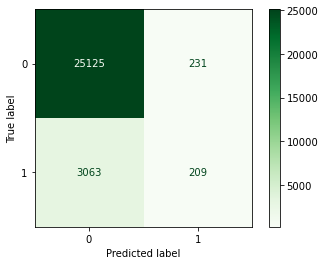

In [ ]:
CM(logreg,X_train,y_train)

0.8931465697918122
La precisión del modelo es: 0.893


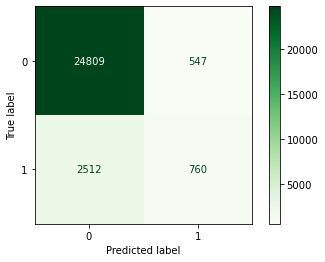

In [ ]:
CM(decision_tree,X_train,y_train)

0.8859158865446416
La precisión del modelo es: 0.886


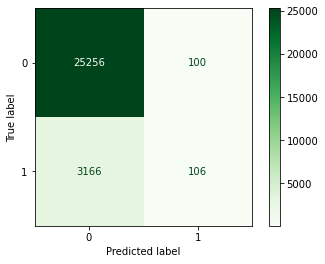

In [ ]:
CM(neural_network,X_train,y_train)

0.8892343160542127
La precisión del modelo es: 0.889


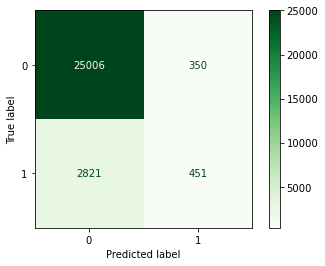

In [ ]:
CM(sup_vec_cla,X_train,y_train)

Ahora quiero mirar cómo actúan los modelos cuando les paso el test:

In [ ]:
test = [X_test,y_test]

In [ ]:
y_score_logreg = logreg.score(X_test,y_test)
y_score_dec_tree = decision_tree.score(X_test,y_test)
y_score_nn = neural_network.score(X_test,y_test)
y_score_svc = sup_vec_cla.score(X_test,y_test)

In [ ]:
y_predict_logreg = logreg.predict(X_test)
y_predict_dec_tree = decision_tree.predict(X_test)
y_predict_nn = neural_network.predict(X_test)
y_predict_svc = sup_vec_cla.predict(X_test)

In [ ]:
y_test.describe()

count    12270.000000
mean         0.111491
std          0.314753
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dummy, dtype: float64

In [ ]:
cm_logreg = confusion_matrix(y_test, y_predict_logreg)
print(cm_logreg)

[[10827    75]
 [ 1276    92]]


In [ ]:
cm_dec_tree = confusion_matrix(y_test, y_predict_dec_tree)
print(cm_dec_tree)

[[10646   256]
 [ 1061   307]]


In [ ]:
cm_nn = confusion_matrix(y_test, y_predict_nn)
print(cm_nn)

[[10868    34]
 [ 1324    44]]


In [ ]:
cm_svc = confusion_matrix(y_test, y_predict_svc)
print(cm_svc)

[[10827    75]
 [ 1276    92]]


In [ ]:
print("Test Accuracy for LogReg:",y_score_logreg)
print("Test Accuracy for DecTre:",y_score_dec_tree)
print("Test Accuracy for NeuNet:",y_score_nn)
print("Test Accuracy for SupVecMac:",y_score_svc)

Test Accuracy for LogReg: 0.8898940505297473
Test Accuracy for DecTre: 0.8926650366748167
Test Accuracy for NeuNet: 0.8893235533822331
Test Accuracy for SupVecMac: 0.8898940505297473


### CONCLUSIONES DE LOS MODELOS:
1) Al parecer, las conclusiones a las que llegamos en el análisis exploratorio fueron bastante acertadas y las variables tomadas como features lograron explicar y predecir aceptablemente la columna 21, obteniendo los modelos unos puntajes superiores al 85%.  
2) De los modelos implementados, quien tuvo mejor score en la fase de entrenamiento fue el Árbol de Decisión, seguido del SVM, de la Red Neuronal y por último, la Regresión Logística. Sin embargo, había que implementar una fase de testeo para asegurarnos que fuera ese quien mejor hiciera las predicciones.  
3) En la fase de testeo, el Árbol de Decisión nuevamente marcó el mejor puntaje, aunque similar al obtenido anteriormente. Sin embargo, se puede observar que la tendencia cambió, y la Regresión Logística y el SVC quedan en segundo lugar empatados, seguido de la Red Neuronal.

##### La recomendación sería seguir entrenando al árbol de decisión y afinar el modelo para futuras predicciones, aunque los 4 tuvieron eficiencias muy similares.
##### También, aunque no lo sabemos, con más variables en juego tales como sexo, cantidad de dinero en banco, etc. el resultado podría haber sido diferente.